In [368]:
### КОММЕНТАРИЙ РЕВЬЮЕРА
## Я буду писать комменты так, т.к. стили не работают

# ЗАДАЧА

Уточняется. 

Цель проекта:
- Изучить данные, разбить жертвователей на группы.
- Постараться предугадать дальнейший возможный трек жертвователя для активных доноров (предпочтительно для тех, с кем есть каналы связи)
- Представить заказчику методику того, как он сможет делать это самостоятельно на обновляющихся данных.

# Заказчик

Благотворительный фонд [«Бюро добрых дел»](https://burodd.ru)

# Анализ сайта

На главной странице сайта можно оформить пожертвование на работу фонда. Вероятно, это те донаты, которые проходят по категории «ПОЖЕРТВОВАНИЕ» в исходом датасете. Предлагается оформить регулярное пожертвование.

Также на сайте есть страница «Наши дети», зайдя на которую, можно оформить адресное пожертвование на обучение, проживание и т.д. для конкретного ребенка. Это разовые (не рекуррентные) платежи. 

# Импорт данных и библиотек

In [369]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [370]:
# параметры виузализации по умолчанию

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['title.fontsize']: 24
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 'large'


sns.layout = 'tight'
sns.set_style('whitegrid')
sns.set_palette('crest')

In [371]:
# plt.rcParams.keys()

In [372]:
# загрузка датасета

#!gdown 1oA0KKNcBCRhtPv3Jc8cUaxMuZs2JLMkH

Импортируем данные о донорах

In [373]:
donors = pd.read_excel('C:/Users/oranz/Desktop/data_analysis/buro_dobrykh_del/pr_masterskaya_buro_dobryh_del.xlsx', sheet_name='Доноры')

donors.head()

,ID,Пол,Город,Дата последней email активности
0,AF575B85-917F-475D-8875-00055586E05B,NaN,NaN,NaT
1,229A9B43-3A15-4A48-8CB6-000EDB240D50,NaN,NaN,NaT
2,C6606486-05A8-4437-ACF9-00344E54FEE1,NaN,NaN,NaT
3,6ED86154-A688-4A11-868F-006209035413,Женский ...,NaN,NaT
4,46C41E20-EA56-4698-9C37-00692FD6FFE8,Женский ...,NaN,NaT


Посмотрим на общую информацию о таблице `donors`

In [374]:
donors = donors.rename(columns=
                       {
                        'ID' : 'donor_id',
                        'Пол' : 'gender',
                        'Город' : 'city',
                        'Дата последней email активности' : 'last_email_dt'
                        }
                       )

In [375]:
donors.shape

(3683, 4)

Проверим на дубликаты:

In [376]:
donors.duplicated().sum()

0

In [377]:
### КОД РЕВЬЮЕРА
## также дополнительно полезно смотреть без столбца ID на возможные дубликаты

potential_duplicates_mask = donors.dropna().duplicated(subset=donors.columns.difference(["donor_id"]),keep=False)
print(potential_duplicates_mask.sum())
donors.dropna()[potential_duplicates_mask].sort_values('last_email_dt').head(20)

277


,donor_id,gender,city,last_email_dt
3227,E24F0340-A42A-4746-B381-E0C3E07A0BFE,Женский ...,Москва,2022-07-18 16:29:28
2629,074F9DF1-04E7-4877-A16D-B5D207C4F99E,Женский ...,Москва,2022-07-18 16:29:28
1891,E76D5D23-EBF3-4C59-AEE2-839662F76B70,Женский ...,Москва,2022-07-18 16:29:28
92,38FC43EF-E469-4DA5-A5F5-070088C99375,Женский ...,Москва,2022-07-18 16:29:28
566,0AA8C81F-EBA3-4FDA-8B8F-28C1263D3E62,Женский ...,Москва,2022-07-18 16:29:28
3662,53CA4686-138F-4A81-BE33-FE6FEB67E114,Женский ...,Москва,2022-07-18 16:29:29
370,2DD32600-AE73-464B-8603-1B091D2BCF4D,Женский ...,Москва,2022-07-18 16:29:29
38,1E50EAB4-4370-4F58-B9BE-038B3C8EB12F,Женский ...,Москва,2022-07-18 16:29:29
273,6F053D56-0AEA-4741-8C84-13E7334CC132,Женский ...,Москва,2022-07-18 16:29:30
369,F4049583-1A25-45C8-9D14-1AF719691C53,Женский ...,Санкт-Петербург,2022-07-18 16:29:30


Проверим на пропуски:

In [378]:
donors.isna().mean()

donor_id         0.000000
gender           0.339940
city             0.724409
last_email_dt    0.501765
dtype: float64

Достоверно заполнить пропуски не представляется возможным, поэтому оставляем их как есть.

Поверхностно посмотрим на данные (проверка на «адекватность» данных):

In [379]:
donors['gender'].value_counts(normalize='True',dropna=False)

Женский                                                                                                                                                                                                                                                       0.508824
NaN                                                                                                                                                                                                                                                           0.339940
Мужской                                                                                                                                                                                                                                                       0.151235
Name: gender, dtype: float64

In [380]:
donors['city'].value_counts(normalize=True).head()

Москва             0.451232
Санкт-Петербург    0.076847
Краснодар          0.022660
Нижний Новгород    0.019704
Новосибирск        0.018719
Name: city, dtype: float64

Импортируем данные о платежах

In [381]:
donations =pd.read_excel('C:/Users/oranz/Desktop/data_analysis/buro_dobrykh_del/pr_masterskaya_buro_dobryh_del.xlsx', sheet_name='Пожертвования')

donations.head()

,Donor ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,Нет ...,SMS bdd,SMS
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,Нет ...,NaN,SMS
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты


Переименуем столбцы для удобства

In [382]:
donations = donations.rename(columns={
                                      'Donor ID' : 'donor_id',
                                      'Сумма платежа' : 'amount',
                                      'Дата платежа' : 'date',
                                      'Назначение платежа' : 'purpose',
                                      'Рекуррентный' : 'is_reccurent',
                                      'Канал оплаты' : 'channel'
                                      }
                             )
donations.head()

,donor_id,date,amount,is_reccurent,purpose,channel
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,Нет ...,SMS bdd,SMS
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,Нет ...,NaN,SMS
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты


Посмотрим на общую информацию о таблице

In [383]:
donations.shape

(14043, 6)

Проверим на дубликаты:

In [384]:
donations.duplicated().sum()

12

Посмотрим на дубликаты:

In [385]:
donations[donations.duplicated()].sort_values('date') # keep=False

,donor_id,date,amount,is_reccurent,purpose,channel
13990,C6CA05F1-C324-46EE-8A5A-7B1302DBB149,2020-12-27,100.0,Нет ...,ДОБРОВОЛЬНОЕ ПОЖЕРТВОВАНИЕ;Сумма 100 руб.;Коми...,Прямые поступления на счет
9594,D38F6A22-9BEF-4484-B377-ED8ED1DB4553,2021-02-11,1.0,Нет ...,ДОБРОВОЛЬНОЕ ПОЖЕРТВОВАНИЕ;Сумма 1.00 руб.;Ком...,Прямые поступления на счет
13775,8FBCD1D4-5490-496F-A089-FB39AB7975AF,2021-04-12,10.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
5166,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
7654,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
10112,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13,20.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
133,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,БЛАГОТВОРИТЕЛЬНОЕ ПОЖЕРТВОВАНИЕ 1.00,Прямые поступления на счет
297,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,БЛАГОТВОРИТЕЛЬНОЕ ПОЖЕРТВОВАНИЕ 1.00,Прямые поступления на счет
1438,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,БЛАГОТВОРИТЕЛЬНОЕ ПОЖЕРТВОВАНИЕ 1.00,Прямые поступления на счет
2837,5D288F50-4F0E-4FDF-A026-863590DF3F69,2022-04-28,1.0,Нет ...,БЛАГОТВОРИТЕЛЬНОЕ ПОЖЕРТВОВАНИЕ 1.00,Прямые поступления на счет


Проверим на пропуски:

In [386]:
donations.isna().sum()

donor_id           0
date               0
amount             0
is_reccurent       0
purpose         1269
channel            0
dtype: int64

In [387]:
donations.isna().mean()

donor_id        0.000000
date            0.000000
amount          0.000000
is_reccurent    0.000000
purpose         0.090365
channel         0.000000
dtype: float64

Есть пропуски в столбце `Purpose`, около 10% пропущенных значений люди не заполнили графу «Назначение платежа», когда оформляли пожертвование.

In [388]:
missing_purpose = donations[donations['purpose'].isna() == True]

# средняя величина платежа
missing_purpose.groupby('is_reccurent')['amount'].mean()

is_reccurent
Нет                                                                                                                                                                                                                                                           306.91647
Name: amount, dtype: float64

In [389]:
# количество платежей
missing_purpose['is_reccurent'].value_counts()

Нет                                                                                                                                                                                                                                                           1269
Name: is_reccurent, dtype: int64

In [390]:
# сумма платежей
missing_purpose.groupby('is_reccurent')['amount'].sum()

is_reccurent
Нет                                                                                                                                                                                                                                                           389477.0
Name: amount, dtype: float64

Все эти пропуски - в разовых платежах, не очень большого размера, когда донор просто не заполнил графу «Назначение».

Проверим, сколько уникальных пользователей в обеих таблицах

In [391]:
donors['donor_id'].nunique(), donations['donor_id'].nunique()

(3683, 3683)

Количество пользователей совпадает. Проверим, все ли `donor_id` совпадают:

In [392]:
donors_cnt = len(set(donors['donor_id'].unique()).intersection(set(donations['donor_id'].unique())))
donors_cnt

3683

Данные корректны.

✅ **Данные выгружены и готовы к дальнейшему изучению.**

Приведем данные в столбце `gender` к более удобному виду:

In [393]:
donors['gender'] = donors['gender'].str.strip().replace(
                                                {
                                                'Женский' : 'female',
                                                'Мужской' : 'male'
                                                }
                                                )

In [394]:

# donors.gender.replace({val:i for i, val in enumerate(sorted(donors.gender.dropna().unique()))}) # мужской пол - 1, женский 0

Для удобства расчетов присвоим значения столбца `is_reccurent` 1 и 0 в зависимости от реккурентности платежа

In [395]:
donations['is_reccurent'].unique()

array(['Да                                                                                                                                                                                                                                                        ',
       'Нет                                                                                                                                                                                                                                                       '],
      dtype=object)

In [396]:
donations['is_reccurent'] = donations['is_reccurent'].str.strip().replace('Нет', '0').replace('Да', '1').astype('int')

Переименуем каналы поступления средств:

In [397]:
donations['channel'] = donations['channel'].str.strip().replace(
    {'Банковские карты' : 'cards', 
     'SMS' : 'sms',
     'Прямые поступления на счет' : 'account',
     'Наличные в кассу' : 'cash'
     }
     )

## Метрики для дальнейших расчетов

Соберем даты первых транзакций для каждого пользователя

In [398]:
first_dt = donations.groupby('donor_id', as_index=False)['date'].min()
first_dt = first_dt.rename(
    columns={
        'date':'first_dt'
        }
        )

Соберем даты последних транзакций для каждого пользователя

In [399]:
last_dt = donations.groupby('donor_id', as_index=False)['date'].max()
last_dt = last_dt.rename(
    columns={
        'date':'last_dt'
        }
        )

Посчитаем количество пожертвований для каждого донора:

In [400]:
donations_per_donor = donations.groupby('donor_id', as_index=False)['amount'].count()
donations_per_donor = donations_per_donor.rename(columns={
    'amount' : 'donations_cnt'
})



Посчитаем сумму пожертвований для каждого донора:

In [401]:
sum_per_donor = donations.groupby('donor_id', as_index=False)['amount'].sum()
sum_per_donor = sum_per_donor.rename(columns={
    'amount' : 'sum_per_donor'
})

In [402]:
# соберем вспомогательный датафрейм profiles
profiles = (donors
            .merge(first_dt, how='left', on='donor_id')
            .merge(last_dt, how='left', on='donor_id')
            .merge(donations_per_donor, how='left', on='donor_id')
            .merge(sum_per_donor, how='left', on='donor_id')
            )

profiles.head()

,donor_id,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor
0,AF575B85-917F-475D-8875-00055586E05B,NaN,NaN,NaT,2019-07-06 15:23:53,2019-07-06 15:23:53,1,100.0
1,229A9B43-3A15-4A48-8CB6-000EDB240D50,NaN,NaN,NaT,2017-07-18 09:01:24,2017-07-18 09:01:24,1,500.0
2,C6606486-05A8-4437-ACF9-00344E54FEE1,NaN,NaN,NaT,2019-10-21 18:31:00,2019-10-21 18:31:00,1,300.0
3,6ED86154-A688-4A11-868F-006209035413,female,NaN,NaT,2021-04-13 00:00:00,2021-04-13 00:00:00,1,500.0
4,46C41E20-EA56-4698-9C37-00692FD6FFE8,female,NaN,NaT,2019-09-10 15:50:55,2019-09-10 15:50:55,1,1042.0


Объединяем все данный в один датафрейм:

In [403]:
df = donations.merge(profiles, how='left', on = 'donor_id')
df.sample(5)

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor
8883,44FF227C-8CC1-4CDA-A8E0-A3B75DDB3A8C,2019-04-26 20:19:43,100.0,0,NaN,sms,NaN,NaN,NaT,2019-04-26 20:19:43,2019-04-26 20:19:43,1,100.0
2022,96AFEB3F-0929-4150-90D7-53883DE0BBD2,2019-04-24 18:14:55,150.0,1,Пожертвование в фонд помощи детям-отказникам и...,cards,male,NaN,2022-07-18 18:40:04,2018-06-24 18:10:41,2019-08-24 18:10:49,15,2250.0
738,B9E49FE9-6994-473C-8A23-C21262563BB2,2018-01-01 17:10:02,1000.0,1,Пожертвование в фонд помощи детям-отказникам и...,cards,male,NaN,2022-07-18 16:29:50,2015-09-01 17:07:07,2018-08-01 17:10:05,34,34000.0
6619,46A69A5C-A0C5-484F-86CE-4517F3171698,2021-04-03 20:23:35,50.0,1,ПОЖЕРТВОВАНИЕ undefined,cards,female,Москва,2022-07-18 16:29:48,2020-12-03 20:23:24,2022-07-03 20:23:33,21,1550.0
2828,5A324717-1569-42C8-B0D5-7DB665713A2B,2017-06-23 16:05:00,200.0,1,Пожертвование в фонд помощи детям-отказникам и...,cards,female,NaN,2022-07-18 16:29:48,2017-05-23 16:02:20,2019-10-24 16:04:04,29,5800.0


In [404]:
df.dtypes

donor_id                 object
date             datetime64[ns]
amount                  float64
is_reccurent              int32
purpose                  object
channel                  object
gender                   object
city                     object
last_email_dt    datetime64[ns]
first_dt         datetime64[ns]
last_dt          datetime64[ns]
donations_cnt             int64
sum_per_donor           float64
dtype: object

Добавим столбец с разницей между датами первой и последней транзакций в месяцах:

In [405]:
df['dt_diff'] = (df['last_dt'] - df['first_dt'])/np.timedelta64(1,'M')
df['dt_diff'] = df['dt_diff'].astype(float).apply(np.floor)

✅ **Добавлены необходимые столбцы с метриками для дальнейшего анализа**

# Исследовательский анализ данных

## `amount`

Посмотрим на среднюю и медианную величину платежа

In [406]:
mean_amount = df['amount'].mean()
median_amount = df['amount'].median()
print(f'Среднее пожертвование: {mean_amount}, медианное пожертвование: {median_amount}')

Среднее пожертвование: 1720.8458064516128, медианное пожертвование: 350.0


Среднее в пять раз больше медианы, что говорит нам о том, что есть очень большие пожертвования, которые смещают хвост распределения вправо.

Выведем основные статистики и посмотрим на распределение

In [407]:
df['amount'].describe()

count    1.404300e+04
mean     1.720846e+03
std      2.949977e+04
min      1.000000e-02
25%      1.500000e+02
50%      3.500000e+02
75%      7.000000e+02
max      3.000000e+06
Name: amount, dtype: float64

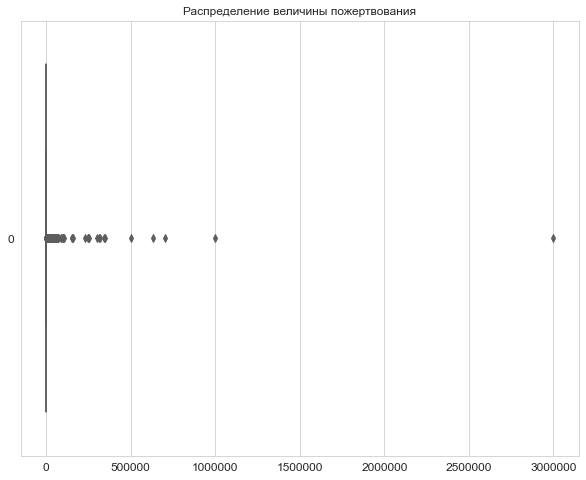

In [408]:
sns.boxplot(data=df['amount'], orient = 'h')
plt.title('Распределение величины пожертвования')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Действительно присутствуют пожертвования, величина которых сильно превышает среднее значение.

Заказчик пояснил, что платежи, на порядок превышающие средние значения, можно не учитывать. Уберем пожертвования, которые превышают 99 перцентиль и внесены иным способом, кроме перевода на банковскую карту. 

**В дальнейшем эти платежи стоит учитывать отдельной категорией**

In [409]:
perc_99 = df['amount'].quantile(0.99)
perc_99

13852.999999999975

In [410]:
df = df.drop(df[(df['amount'] > perc_99) & (df['channel'] != "cards")].index)

Посмотрим, сколько доноров осталось в датасете:

In [411]:
donors_cnt_without_outliers = df['donor_id'].nunique()
donors_cnt_without_outliers

3671

Сколько доноров «потеряли»:

In [412]:
print(f'{round((donors_cnt - donors_cnt_without_outliers) / donors_cnt * 100, 2)}%')

0.33%


Выведем статистики и визуализируем распределения в очищенном от выбросов датасете:

In [413]:
round(df['amount'].describe())

count     14008.0
mean       1058.0
std        4697.0
min           0.0
25%         150.0
50%         338.0
75%         600.0
max      250000.0
Name: amount, dtype: float64

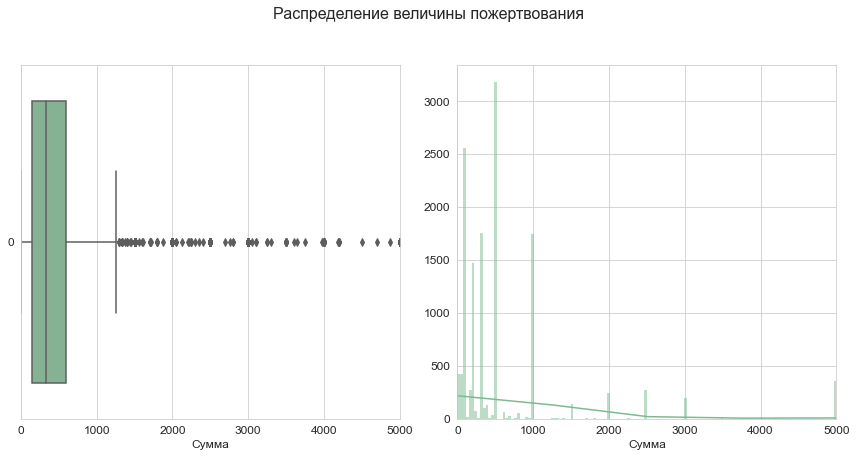

In [414]:
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle('Распределение величины пожертвования', fontsize=16, y =1.05)

plt.subplot(121)
sns.boxplot(data=df['amount'], orient = 'h')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Сумма')
plt.xlim(0,5000)

plt.subplot(122)
sns.histplot(df['amount'], kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Сумма')
plt.ylabel('')
plt.xlim(0,5000)

plt.tight_layout()
plt.show()

Видим скопления платежей у круглых чисел: 500, 1000, 1500, 2000 и т.д.

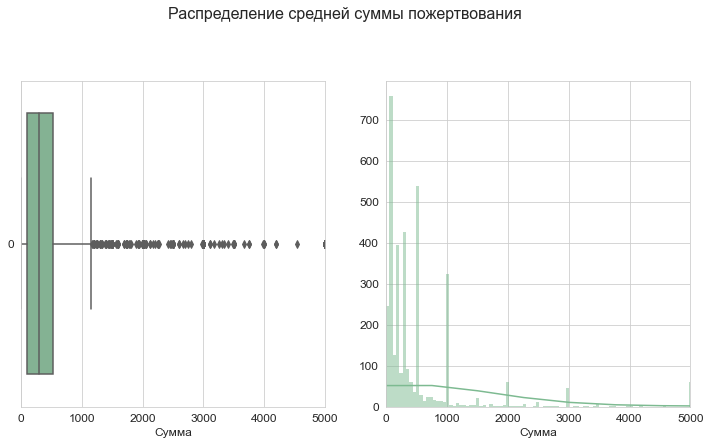

In [415]:
fig, ax = plt.subplots(figsize=(12,6))
plt.suptitle('Распределение средней суммы пожертвования', fontsize=16, y =1.05)

plt.subplot(121)
sns.boxplot(data = 
            df.groupby('donor_id')['amount'].mean(), orient='h')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Сумма')
plt.xlim(0,5000)

plt.subplot(122)
sns.histplot(df.groupby('donor_id')['amount'].mean(), kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Сумма')
plt.ylabel('')
plt.xlim(0,5000)
plt.show()


✅ **Характеристики пожертвований в очищенном датасете:**

In [416]:
print(f'''
Среднее значение платежа: {round(df['amount'].mean())}
Медианное значение платежа: {round(df['amount'].median())}
Максимальное значение платежа: {round(df['amount'].max())}''')


Среднее значение платежа: 1058
Медианное значение платежа: 338
Максимальное значение платежа: 250000


In [417]:
df[['donor_id', 'channel', 'amount']].sort_values(by='amount', ascending=False).head(20)

,donor_id,channel,amount
6557,7359E58F-BB53-4354-85DE-EFF6175EDE5B,cards,250000.0
6832,F34F0A06-0F03-437D-883A-0CF49D86D09F,cards,150000.0
3883,4BE22982-E13D-4142-81A5-AB01B06606DA,cards,150000.0
9571,A45265C0-14D3-480F-B656-8D8E95AA9280,cards,100000.0
6682,A62D0D03-2A40-4169-B7AC-83AD27BAA456,cards,100000.0
2984,A62D0D03-2A40-4169-B7AC-83AD27BAA456,cards,100000.0
3256,D86440D1-B541-454D-857E-A54053F282A9,cards,100000.0
13461,4CF1FE5A-E93C-4425-B56B-AFE271294F9B,cards,100000.0
2555,66C34842-A23B-40E5-9482-D8E591DFA23C,cards,100000.0
9550,333F430A-EF76-4CA3-A74B-779C3730AF74,cards,85000.0


In [418]:
df.query('donor_id =="C7060FB3-FA12-4B52-92AD-79040FD0A20F"')

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor,dt_diff
612,C7060FB3-FA12-4B52-92AD-79040FD0A20F,2019-12-23 13:09:14,70000.0,0,ПОЖЕРТВОВАНИЕ,cards,male,NaN,2022-07-18 16:29:56,2019-12-13 18:21:47,2020-04-30 18:04:20,4,230000.0,4.0
7926,C7060FB3-FA12-4B52-92AD-79040FD0A20F,2020-04-02 17:33:18,60000.0,0,ПОЖЕРТВОВАНИЕ,cards,male,NaN,2022-07-18 16:29:56,2019-12-13 18:21:47,2020-04-30 18:04:20,4,230000.0,4.0
12996,C7060FB3-FA12-4B52-92AD-79040FD0A20F,2020-04-30 18:04:20,40000.0,0,ПОЖЕРТВОВАНИЕ,cards,male,NaN,2022-07-18 16:29:56,2019-12-13 18:21:47,2020-04-30 18:04:20,4,230000.0,4.0
13759,C7060FB3-FA12-4B52-92AD-79040FD0A20F,2019-12-13 18:21:47,60000.0,0,ПОЖЕРТВОВАНИЕ,cards,male,NaN,2022-07-18 16:29:56,2019-12-13 18:21:47,2020-04-30 18:04:20,4,230000.0,4.0


## `first_dt` - new

Определим, сколько новых доноров появлялось каждый год:

In [419]:
donations.sort_values('date').groupby('donor_id').agg(_first_d = ("date","first")).reset_index()

,donor_id,_first_d
0,0001AFDD-94E3-48F3-B5E7-D5539700425E,2019-04-26 19:19:24
1,000711B2-2785-461B-BF5B-5CB7D2CABA20,2020-03-27 08:23:58
2,0015A100-2D8C-4262-A9B3-BB1461C0C8B8,2021-07-27 12:15:05
3,002CB994-10CD-45E9-B6ED-ED7F3C90D7A9,2017-04-27 08:26:17
4,006F71D7-DFCF-4E7A-B9AD-B4721BEF4F7A,2019-04-27 00:02:19
...,...,...
3678,FF946FD1-EEF8-4541-A906-BAE64527AAA5,2019-05-01 20:27:40
3679,FFA30123-A516-44A7-B030-F83ED369B645,2020-03-27 19:55:41
3680,FFB1C4FA-F950-4BB7-A1F2-9DD655298FFF,2019-04-26 20:37:02
3681,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-08-29 00:00:00


In [420]:
new_donors_by_year = (donations
                      .sort_values('date')
                      .groupby('donor_id')
                      .agg({"date":"first"})
                      .reset_index()
                      .groupby([pd.Grouper(key='date', freq='Y')])
                      .nunique())
new_donors_by_year = (new_donors_by_year
                      .reset_index()
                      .rename(columns=
                              {'donor_id' : 'count',
                          'date' : 'first_year'}
                          )
                          )

new_donors_by_year

,first_year,count
0,2015-12-31,92
1,2016-12-31,117
2,2017-12-31,415
3,2018-12-31,114
4,2019-12-31,1462
5,2020-12-31,838
6,2021-12-31,469
7,2022-12-31,176


Визуализируем:

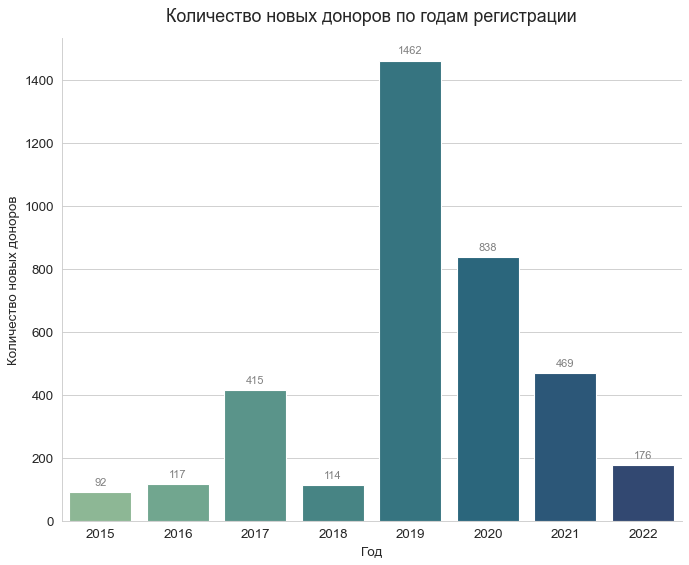

In [421]:
plt.figure(dpi=80)

g = sns.barplot(data=new_donors_by_year, 
            x='first_year', 
            y='count',
            palette='crest'
            )

for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9),
                   color='grey',
                   textcoords = 'offset points') 


# задаем формат подписей оси х 
ticklabels = [new_donors_by_year['first_year'][int(tick)].strftime('%Y') for tick in g.get_xticks()]
g.set_xticklabels(ticklabels)

plt.title('Количество новых доноров по годам регистрации', fontsize=16, y=1.02)
g.set_xlabel('Год')
plt.ylabel('Количество новых доноров')

sns.despine()
plt.show()

✅ **Больше всего доноров зарегистрировалось в 2019 году. С тех пор количество новых жертвователей снижается.**

Визуализируем изменение суммы и среднего пожертвования по месяцам:

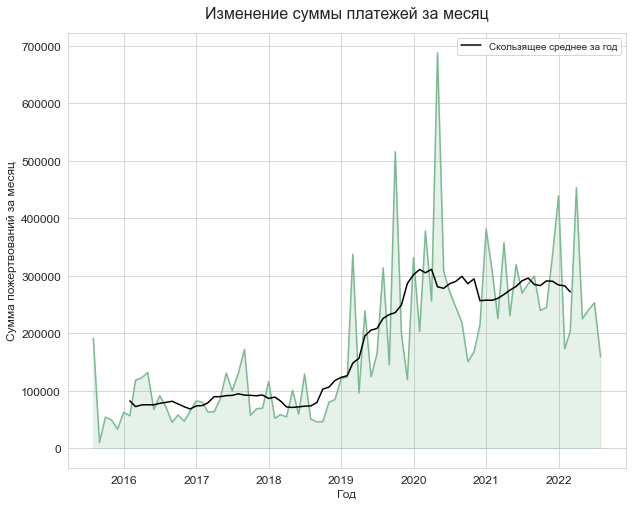

In [422]:
donations_by_month = df.groupby([pd.Grouper(key='date', freq='M')]).agg({
    'donor_id' : 'nunique',
    'amount' : 'sum'
})
donations_by_month['rolling'] = donations_by_month['amount'].rolling(12, center=True).mean()

ax = sns.lineplot(data=donations_by_month, x='date', y='amount')


# добавим заливку под графиком
for line in ax.lines:
        x, y = line.get_xydata().T
        ax.fill_between(x, 0, y, color=line.get_color(), alpha=0.2)

ax2 = sns.lineplot(data=donations_by_month, x='date', y='rolling', color='k', label='Скользящее среднее за год')

plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Изменение суммы платежей за месяц', fontsize=16, y=1.02)
ax.set_xlabel('Год')
ax.set_ylabel('Сумма пожертвований за месяц')
plt.legend()
plt.show()

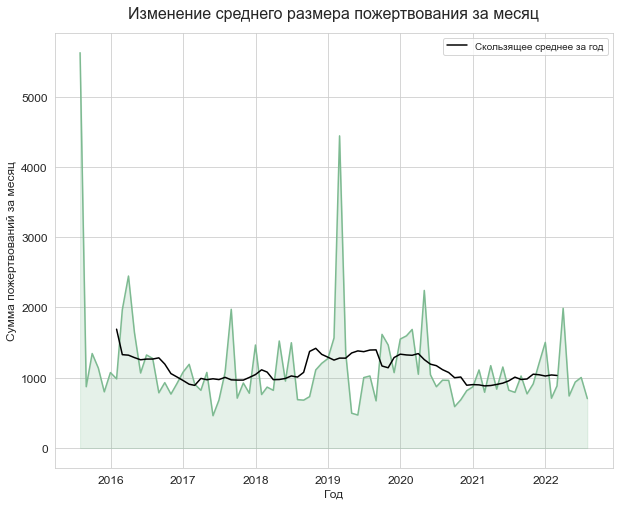

In [423]:
donations_by_month = df.groupby([pd.Grouper(key='date', freq='M')]).agg({
    'donor_id' : 'nunique',
    'amount' : 'mean'
})
donations_by_month['rolling'] = donations_by_month['amount'].rolling(12, center=True).mean()


ax = sns.lineplot(data=donations_by_month, x='date', y='amount')

# добавим заливку под графиком
for line in ax.lines:
        x, y = line.get_xydata().T
        ax.fill_between(x, 0, y, color=line.get_color(), alpha=0.2)

ax2 = sns.lineplot(data=donations_by_month, x='date', y='rolling', color='k', label='Скользящее среднее за год')

plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Изменение среднего размера пожертвования за месяц', fontsize=16, y=1.02)
ax.set_xlabel('Год')
ax.set_ylabel('Сумма пожертвований за месяц')
plt.show()

✅ **Сумма пожертвований за месяц растет с течением времени, при этом средний размер пожертвования имеет тенденцию к плавному снижению.**

## `donations_cnt` - new

Значение этого столбца показывает, сколько всего пожертвований сделал донор. Выведем описательные статистики и сделаем визуализацию.

In [424]:
### КОММЕНТ РЕВЬЮЕРА
## Тут смешиваются крупные и совсем мелкие пожертвования, возвраты
## наверное имеет смысл для каждого жертвователя считать 
## количество пожертвований разного размера

In [425]:
df['donations_cnt'].describe()

count    14008.000000
mean        19.982224
std         17.681250
min          1.000000
25%          3.000000
50%         18.000000
75%         29.000000
max         83.000000
Name: donations_cnt, dtype: float64

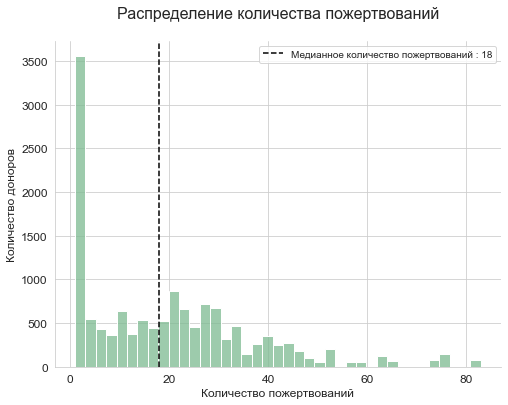

In [426]:
plt.figure(figsize=(8,6))
ax = sns.histplot(data=df['donations_cnt'])

ax.axvline(df['donations_cnt'].median(),
           label=f'Медианное количество пожертвований : {round(df["donations_cnt"].median())}',
           color='k',
           linestyle='--')

ax.set_xlabel('Количество пожертвований')
ax.set_ylabel('Количество доноров')
ax.set_title('Распределение количества пожертвований', fontsize=16, y=1.05)

plt.legend()
sns.despine()
plt.show()

Посмотрим, как меняется число пожертвований в месяц. Добавим на график значение скользящего среднего за год для наглядности.

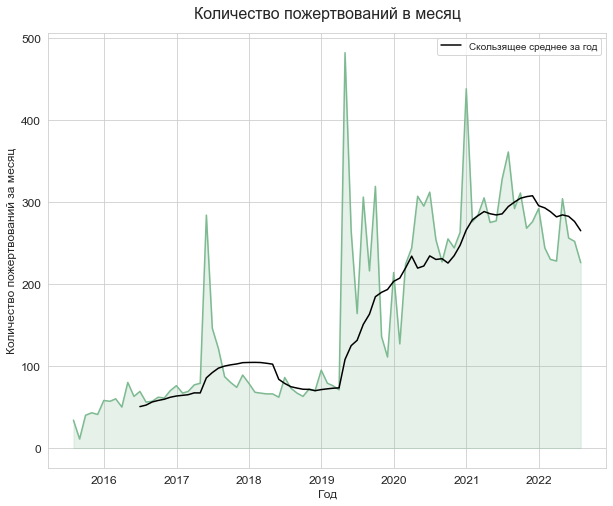

In [427]:
donations_cnt_by_month = df.groupby([pd.Grouper(key='date', freq='M')]).agg({
    'donor_id' : 'nunique',
    'amount' : 'count'
})
donations_cnt_by_month['rolling'] = donations_cnt_by_month['amount'].rolling(12).mean()


ax = sns.lineplot(data=donations_cnt_by_month, x='date', y='amount')

# добавим заливку под графиком
for line in ax.lines:
        x, y = line.get_xydata().T
        ax.fill_between(x, 0, y, color=line.get_color(), alpha=0.2)

ax2 = sns.lineplot(data=donations_cnt_by_month, x='date', y='rolling', color='k', label='Скользящее среднее за год')

plt.ticklabel_format(style='plain', axis='y')
ax.set_title('Количество пожертвований в месяц', fontsize=16, y=1.02)
ax.set_xlabel('Год')
ax.set_ylabel('Количество пожертвований за месяц')
plt.show()

✅ **Количество пожертвований в месяц растет.**

In [428]:
### КОММЕНТ РЕВЬЮЕРА
## мы выше посмотрели как менялся средний чек по времени
## ты уже добавил столбцы, по которым тут можно небольшими усилиями 
## также посчитать количество пожертвований на человека

## `purpose`

Посмотрим, сколько уникальных назначений для пожертвования:

In [429]:
df['purpose'].nunique()

873

In [430]:
df['purpose'].value_counts().head(30)

ПОЖЕРТВОВАНИЕ                                                                     3810
Пожертвование в фонд помощи детям-отказникам и детям-сиротам "Бюро Добрых Дел"    3335
ПОЖЕРТВОВАНИЕ  undefined                                                          2162
Добровольное пожертвование. НДС не облагается                                      493
SMS bdd                                                                            253
ПОЖЕРТВОВАНИЕ Клуб друзей                                                          127
На психологические консультации Артёму                                              87
ПОЖЕРТВОВАНИЕ без назначения                                                        72
Пожертвование на обучение Артёма                                                    62
Пожертвование на обучение Александры                                                59
День рождения со смыслом_М. Виторган                                                55
На работу фонда                            

Нужно категоризировать цели пожертвований.

In [431]:
# удалим пробелы в начале и конце строк, приведем все записи к нижнему регистру
df['purpose'] = df['purpose'].str.strip()
df['purpose'] = df['purpose'].str.lower()

In [432]:
df['purpose'].value_counts()

пожертвование                                                                                         3836
пожертвование в фонд помощи детям-отказникам и детям-сиротам "бюро добрых дел"                        3335
пожертвование  undefined                                                                              2162
добровольное пожертвование. ндс не облагается                                                          493
sms bdd                                                                                                253
                                                                                                      ... 
добровольное пожертвование;сумма 300 руб.;комиссия 0 руб;дата оплаты 04/11/2020;                         1
добровольное пожертвование;сумма 500.00 руб.;комиссия 0.00 руб;дата оплаты 05/04/2021;                   1
добровольное пожертвование;сумма 35 руб.;комиссия 0 руб;дата оплаты 05/12/2020;                          1
добровольное пожертвование;сумма 100 

In [433]:
# заменяем полное название фонда
df['purpose'] = (df['purpose']
                 .str
                 .replace('пожертвование в фонд помощи детям-отказникам и детям-сиротам "бюро добрых дел"', 'пожертвование'))

Изучим основные варианты в графе «Назначение»:

In [434]:
with pd.option_context("display.max_rows", 1000):
  display(df['purpose'].value_counts().reset_index().head(20))

,index,purpose
0,пожертвование,7171
1,пожертвование undefined,2162
2,добровольное пожертвование. ндс не облагается,493
3,sms bdd,253
4,пожертвование клуб друзей,127
5,на психологические консультации артёму,87
6,пожертвование без назначения,72
7,пожертвование на обучение артёма,62
8,пожертвование на обучение александры,59
9,день рождения со смыслом_м. виторган,55


Проверим вторую по популярности категорию «пожертвование undefined»:

In [435]:
df[df['purpose'].str.contains("undefined") == True]['is_reccurent'].value_counts()

1    2158
0       4
Name: is_reccurent, dtype: int64

В подавляющем большинстве это рекуррентные платежи, поэтому объединяем их с категорией «пожертвование».

In [436]:
df['purpose'] = (df['purpose']
                 .str
                 .replace('пожертвование  undefined', 'пожертвование')
                 )

with pd.option_context("display.max_rows", 1000):
  display(df['purpose'].value_counts().reset_index().head(20))

,index,purpose
0,пожертвование,9333
1,добровольное пожертвование. ндс не облагается,493
2,sms bdd,253
3,пожертвование клуб друзей,127
4,на психологические консультации артёму,87
5,пожертвование без назначения,72
6,пожертвование на обучение артёма,62
7,пожертвование на обучение александры,59
8,день рождения со смыслом_м. виторган,55
9,на работу фонда,42


In [437]:
df.query('purpose =="добровольное пожертвование. ндс не облагается"')['is_reccurent'].value_counts()

0    493
Name: is_reccurent, dtype: int64

Посмотрим, сколько осталось регулярных платежей:

In [438]:
df.query('purpose != "пожертвование"').groupby('is_reccurent').count()

,donor_id,date,amount,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor,dt_diff
is_reccurent,,,,,,,,,,,,,
0,4440,4440,4440,3170,4440,3090,2027,1855,4440,4440,4440,4440,4440
1,235,235,235,235,235,235,150,235,235,235,235,235,235


In [439]:
df.query('purpose != "пожертвование" and is_reccurent == 1').head()

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor,dt_diff
98,A8FA1586-2D74-412C-A226-96C35848DBFA,2019-06-09 11:06:13,2500.0,1,пожертвование клуб друзей,cards,female,NaN,2022-06-09 10:54:09,2019-06-09 11:06:13,2019-07-09 11:06:59,2,5000.0,0.0
116,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-03-28 16:20:08,10000.0,1,пожертвование клуб друзей,cards,female,Москва,2022-07-20 01:16:23,2016-11-19 21:18:03,2022-03-01 16:33:56,39,398000.0,63.0
206,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-12-28 16:19:46,10000.0,1,пожертвование клуб друзей,cards,female,Москва,2022-07-20 01:16:23,2016-11-19 21:18:03,2022-03-01 16:33:56,39,398000.0,63.0
237,67BED449-3429-4190-AA55-DF8267B7A196,2020-10-01 14:41:41,2500.0,1,пожертвование клуб друзей,cards,male,Мытищи,2022-07-18 18:07:26,2018-12-01 14:41:09,2022-07-01 14:41:51,44,110000.0,42.0
292,FD96893A-58D9-4B07-A493-D50E6EA87F97,2020-01-13 00:21:18,30.0,1,пожертвование без назначения,cards,female,NaN,2022-07-18 16:29:49,2018-12-13 00:15:57,2021-01-13 00:17:25,26,780.0,25.0


Объединяем их с категорией пожертвование и приводим к названию «фонд»:

In [440]:
df['purpose'] = df['purpose'].replace('пожертвование', 'фонд')
df.loc[(df['purpose'] != "пожертвование") & (df['is_reccurent'] == 1), 'purpose'] = 'фонд'


Выделяются также категории «на обучение», «на проживание», «на тьютора» для разных детей.

**Уточнить у заказчика**, можно ли объединить эти пожертвования в категории, а остальные, число которых невелико, поместить в категоорию «другие».

Оценим медианный размер пожертвования по часто встречающимся назначениям платежа

In [441]:
df.loc[df['purpose'].str.contains("обучение") == True]['amount'].median()

500.0

In [442]:
df.loc[df['purpose'].str.contains("проживание") == True]['amount'].median()

500.0

In [443]:
df.loc[df['purpose'].str.contains("тьютор") == True]['amount'].median()

500.0

Считаю, что можно объединить все эти назначения в категорию «целевые пожертвования».

In [444]:
### КОММЕНТ РЕВЬЮЕРА
## да, здравая идея

## `date`

Выведем минимальную и максимальную даты в датасете:

In [445]:
df['date'].min(), df['date'].max()

(Timestamp('2015-07-19 20:10:11'), Timestamp('2022-07-28 19:22:15'))

## `is_reccurent`

Посмотрим, для какого процента доноров по годам первый платеж стал рекуррентным:

In [446]:
new_donors_by_rec = df.groupby([pd.Grouper(key='first_dt', freq='Y')])['is_reccurent'].mean().reset_index()
new_donors_by_rec = new_donors_by_rec.rename(
    columns={
       'is_reccurent' : 'mean' 
    }
)

new_donors_by_rec

,first_dt,mean
0,2015-12-31,0.942611
1,2016-12-31,0.725275
2,2017-12-31,0.544823
3,2018-12-31,0.800000
4,2019-12-31,0.319517
5,2020-12-31,0.653624
6,2021-12-31,0.381890
7,2022-12-31,0.115108


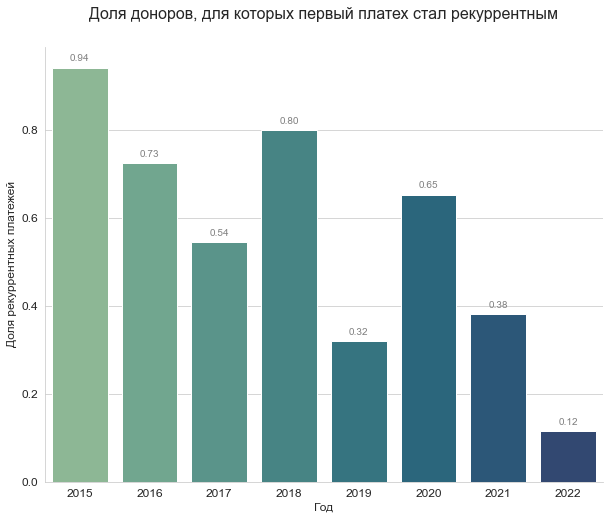

In [447]:
g = sns.barplot(data=new_donors_by_rec, 
            x='first_dt', 
            y='mean',
            palette='crest'
            )

# добавляем значения баров на график
for p in g.patches:
    g.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9),
                   color='grey',
                   textcoords = 'offset points') 

# задаем формат подписей оси х 
ticklabels = [new_donors_by_rec['first_dt'][int(tick)].strftime('%Y') for tick in g.get_xticks()]
g.set_xticklabels(ticklabels)

plt.title('Доля доноров, для которых первый платех стал рекуррентным', fontsize=16, y=1.05)
plt.xlabel('Год')
plt.ylabel('Доля рекуррентных платежей')

sns.despine()
plt.show()

In [448]:
### КОММЕНТ РЕВЬЮЕРА
## хороший график из серии "всё плохо"
## (если сезонность не влияет на долю реккурентов)

Посмотрим, на какие суммы чаще всего оформляется рекуррентный платеж:






In [449]:
reccurent_amount = (df
                    .query('is_reccurent == 1')
                    .groupby('amount', as_index=False)['donor_id']
                    .count()
                    .sort_values(by='donor_id', ascending=False)
                    .rename(columns={
                        'donor_id' : 'count'
                        })
                    .head(10)
                    )
reccurent_amount.index = range(10)
reccurent_amount

,amount,count
0,500.0,2190
1,100.0,1488
2,1000.0,1052
3,300.0,1049
4,200.0,933
5,2500.0,249
6,150.0,154
7,5000.0,142
8,50.0,138
9,2000.0,107


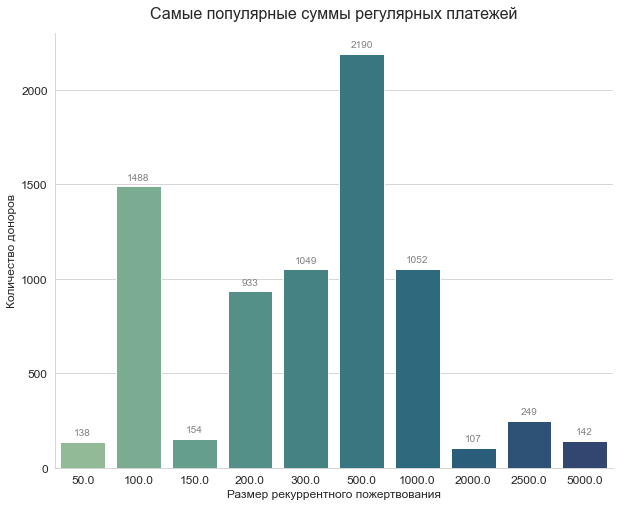

In [450]:
ax = sns.barplot(data=reccurent_amount, 
            x='amount', 
            y='count',
            palette='crest'
            )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', 
                   va = 'center', 
                   xytext = (0, 9),
                   color='grey',
                   textcoords = 'offset points') 
    
sns.despine()
plt.title('Самые популярные суммы регулярных платежей', fontsize=16, y=1.02)
plt.xlabel('Размер рекуррентного пожертвования')
plt.ylabel('Количество доноров')
plt.show()

✅ **Чаще всего оформляются платежи:**
- на 500р — 2190 человек;
- на 100р — 1488 человек;
- на 300р и 1000р — по 1050 человек

Добавим столбец, который покажет, с какого платежа начинал донор - с разового или регулярного:

In [451]:
df_first = df.query('is_reccurent == 1 and date == first_dt')['donor_id'].unique()
df['is_first_rec'] = [1 if i in df_first else 0 for i in df['donor_id']]

Проверим, правильно ли отрабатывает код, на одном пользователе:

In [452]:
df.query('donor_id == "0B6DA68C-558B-4153-806E-B1D775585B88"')

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor,dt_diff,is_first_rec
141,0B6DA68C-558B-4153-806E-B1D775585B88,2017-04-12 14:55:00,100.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1
154,0B6DA68C-558B-4153-806E-B1D775585B88,2017-07-03 11:32:03,200.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1
263,0B6DA68C-558B-4153-806E-B1D775585B88,2016-01-12 14:55:05,100.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1
522,0B6DA68C-558B-4153-806E-B1D775585B88,2019-04-03 11:35:00,200.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1
543,0B6DA68C-558B-4153-806E-B1D775585B88,2019-08-03 11:32:52,200.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12988,0B6DA68C-558B-4153-806E-B1D775585B88,2018-04-03 11:34:59,200.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1
13151,0B6DA68C-558B-4153-806E-B1D775585B88,2016-10-12 14:55:05,100.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1
13552,0B6DA68C-558B-4153-806E-B1D775585B88,2021-06-03 11:32:15,200.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1
13959,0B6DA68C-558B-4153-806E-B1D775585B88,2019-02-03 11:34:59,200.0,1,фонд,cards,female,NaN,2022-07-18 16:29:47,2015-12-12 14:50:34,2022-07-03 11:32:28,76,13500.0,78.0,1


✅ **Посмотрим, как отличаются показатели пользователей, которые начинали с разового и регулярного платежей:**

In [453]:
print(f"""
Пользователи с первым реккурентным платежом:
- суммарно принесли: {df.query('is_first_rec == 1')['amount'].sum()}
- средний платеж: {round(df.query('is_first_rec == 1')['amount'].mean())}
- медианный платеж: {df.query('is_first_rec == 1')['amount'].median()}

Пользователи с первым разовым платежом:
- суммарно принесли: {df.query('is_first_rec == 0')['amount'].sum()}
- средний платеж: {round(df.query('is_first_rec == 0')['amount'].mean())}
- медианный платеж: {df.query('is_first_rec == 0')['amount'].median()}

""")


Пользователи с первым реккурентным платежом:
- суммарно принесли: 5069233.0
- средний платеж: 689
- медианный платеж: 400.0

Пользователи с первым разовым платежом:
- суммарно принесли: 9745916.66
- средний платеж: 1464
- медианный платеж: 300.0




## `channel`

In [454]:
df['channel'].value_counts(normalize=True)

cards      0.799829
sms        0.105226
account    0.094946
Name: channel, dtype: float64

In [455]:
df['channel'] = df['channel'].str.strip().replace(
    {'Банковские карты' : 'cards', 
     'SMS' : 'sms',
     'Прямые поступления на счет' : 'account',
     'Наличные в кассу' : 'cash'
     }
     )

In [456]:
df.groupby('channel').agg({
    'amount' : ['sum', 'count', 'mean', 'median']
}).round()

amount                      
                sum  count    mean median
channel                                  
account    887300.0   1330   667.0  200.0
cards    13530111.0  11204  1208.0  500.0
sms        397739.0   1474   270.0  200.0

Посмотрим, как меняется количество пожертвований через разные каналы по годам:

In [457]:
channel_cnt_by_year = pd.crosstab(
    df['channel'], 
    df['date'].dt.year, 
    values=df['amount'], 
    aggfunc='count').round().reset_index().T

channel_cnt_by_year.columns = channel_cnt_by_year.iloc[0]
channel_cnt_by_year = channel_cnt_by_year.drop('channel')

In [458]:
channel_cnt_by_year

channel,account,cards,sms
date,,,
2015,NaN,227.0,NaN
2016,NaN,761.0,NaN
2017,NaN,1077.0,175.0
2018,NaN,822.0,33.0
2019,173.0,1338.0,927.0
2020,319.0,2592.0,279.0
2021,496.0,2994.0,55.0
2022,342.0,1393.0,5.0


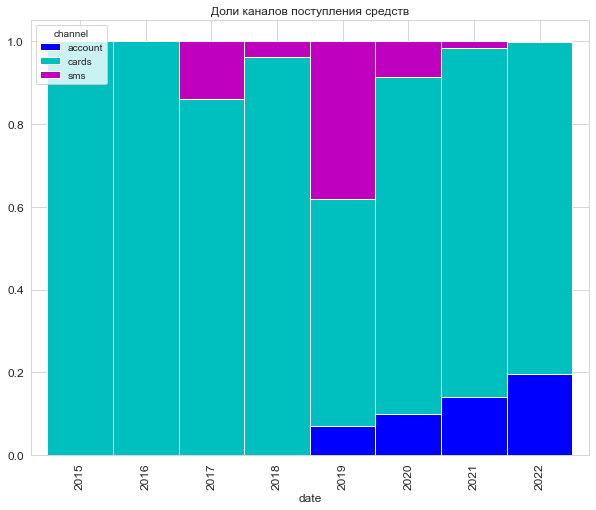

In [459]:
### КОД РЕВЬЮЕРА
## если нас интересуют сами каналы, то лучше смотреть на доли
( channel_cnt_by_year.fillna(0).T / channel_cnt_by_year.sum(axis=1) ).T\
  .plot(color=['b','c','m'], kind='bar', stacked=True, width=1.0)\
  .set(title="Доли каналов поступления средств");

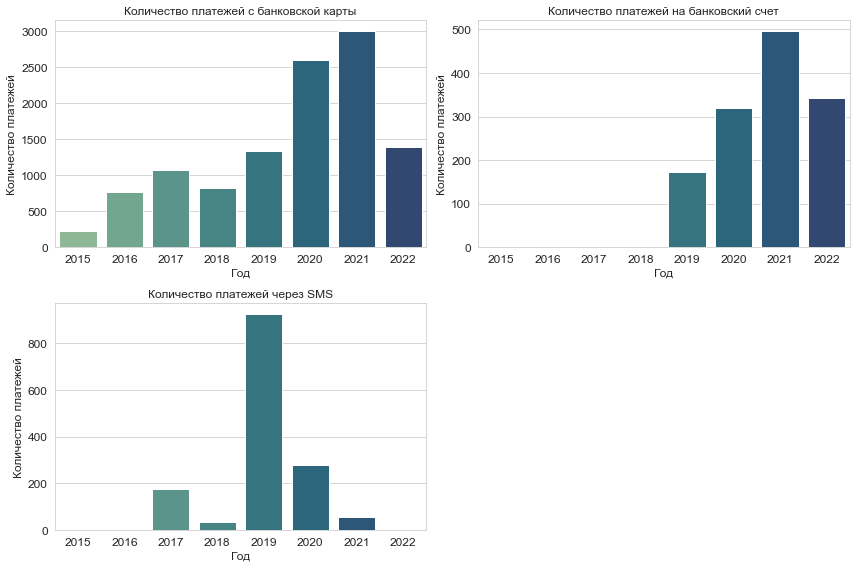

In [460]:
plt.figure(figsize=(12,8))


plt.subplot(221)
sns.barplot(data= channel_cnt_by_year, x=channel_cnt_by_year.index, y='cards', palette='crest')
plt.title('Количество платежей с банковской карты')
plt.xlabel('Год')
plt.ylabel('Количество платежей')

plt.subplot(222)
sns.barplot(data= channel_cnt_by_year, x=channel_cnt_by_year.index, y='account', palette='crest')
plt.title('Количество платежей на банковский счет')
plt.xlabel('Год')
plt.ylabel('Количество платежей')

plt.subplot(223)
sns.barplot(data= channel_cnt_by_year, x=channel_cnt_by_year.index, y='sms', palette='crest')
plt.title('Количество платежей через SMS')
plt.xlabel('Год')
plt.ylabel('Количество платежей')

plt.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()

✅ Количество платежей с карты и на банковский счет растет по годам, а количество SMS-платежей снижается. Но есть очень сильный пик SMS-сообщений в 2019 году.

## `gender`

In [461]:
# уберем лишние пробелы 
df['gender'] = df['gender'].str.strip()

df['gender'] = df['gender'].replace(
    {
    'Женский' : 'female',
    'Мужской' : 'male'
    }
    )

Посмотрим на распределение доноров:

In [462]:
gender_distr = df.groupby('gender', as_index=False)['donor_id'].nunique()
gender_distr = gender_distr.rename(columns={'donor_id' : 'count'})
gender_distr['ratio'] = round(gender_distr['count'] / gender_distr['count'].sum(), 3)
gender_distr

,gender,count,ratio
0,female,1868,0.772
1,male,551,0.228


✅ **Среди доноров, указавших пол, примерно 78% женщин и 22 мужчин. Еще 1246 доноров не указали пол.**

Выведем характеристики размера платежа в зависимости от пола:

In [463]:
df.groupby('gender', dropna=False).agg({
    'amount' : ['sum', 'count', 'mean', 'median']
}).round()

amount                     
              sum count    mean median
gender                                
female  8759140.0  9654   907.0  300.0
male    5181186.0  2784  1861.0  500.0
NaN      874824.0  1570   557.0  200.0

✅ **Женщины сделали значительно больше платежей, но средний и медианный размер пожертвований мужчин почти в два раза выше**

In [464]:
### КОММЕНТ РЕВЬЮЕРА
## хорошее наблюдение, которое хорошо на отдельном слайде будет представить
## с каким-то графиком

Какова доля рекуррентных платежей в зависимости от пола:

In [465]:
df.groupby('gender', as_index=False, dropna=False)['is_reccurent'].mean().round(2)

,gender,is_reccurent
0,female,0.65
1,male,0.61
2,NaN,0.10


Средний размер рекуррентного платежа:

In [466]:
df.query('is_reccurent == 1').groupby('gender', as_index=False, dropna=False)['amount'].mean().round()

,gender,amount
0,female,608.0
1,male,1127.0
2,NaN,993.0


Медианный размер рекуррентного платежа:

In [467]:
df.query('is_reccurent == 1').groupby('gender', as_index=False, dropna=False)['amount'].median().round()

,gender,amount
0,female,300.0
1,male,500.0
2,NaN,300.0


Средний размер разового платежа:

In [468]:
df.query('is_reccurent == 0').groupby('gender', as_index=False, dropna=False)['amount'].mean().round()

,gender,amount
0,female,1452.0
1,male,3017.0
2,NaN,511.0


Медианный размер разового платежа:

In [469]:
df.query('is_reccurent == 0').groupby('gender', as_index=False, dropna=False)['amount'].median().round()

,gender,amount
0,female,400.0
1,male,500.0
2,NaN,200.0


✅ **И по регулярным, и по разовым платежам мужчины жертвуют в среднем больше, чем женщины**

Посмотрим, каков жизненный цикл доноров в зависимости от пола и того, был ли рекуррентный платеж первым:

In [470]:
np.floor(df.query('is_first_rec == 1').groupby('gender')['dt_diff'].mean())

gender
female    25.0
male      36.0
Name: dt_diff, dtype: float64

In [471]:
np.floor(df.query('is_first_rec == 0').groupby('gender')['dt_diff'].mean())

gender
female    18.0
male      15.0
Name: dt_diff, dtype: float64

✅ **Если рекуррентный платеж был первым, жизненный цикл мужчин-доноров в 1,5 раза дольше, чем женщин (36 против 25 месяцев). Если первым был разовый платеж, то жизненный цикл женщин-доноров на 2 месяца длиннее (18 и 16 месяцев соответственно).**


## `lifetime` - new

Добавим столбец 'lifetime', который будет показывать, сколько прошло месяцев с момента регистрации пользователя до текущего платежа. Моментом регистрации считаем момент первого платежа.

In [472]:
df['lifetime'] = (df['date'] - df['first_dt'] )/np.timedelta64(1,'M')
df['lifetime'] = df['lifetime'].astype(float).apply(np.floor)

In [473]:
df.head()

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor,dt_diff,is_first_rec,lifetime
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,1,фонд,cards,female,Москва,2022-06-03 20:15:57,2020-12-30 11:42:20,2022-07-03 19:49:48,21,3500.0,18.0,1,18.0
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,0,sms bdd,sms,female,Москва,2022-07-18 17:19:02,2019-10-11 09:03:12,2022-04-29 17:18:36,11,4200.0,30.0,0,5.0
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,0,добровольное пожертвование. ндс не облагается,account,male,NaN,NaT,2022-04-07 00:00:00,2022-07-07 00:00:00,3,63.0,2.0,0,0.0
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,0,NaN,sms,NaN,NaN,NaT,2019-12-26 02:25:42,2019-12-26 02:25:42,1,300.0,0.0,0,0.0
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,1,фонд,cards,female,NaN,2022-07-20 20:32:37,2020-12-26 01:25:32,2022-07-26 01:25:45,18,3600.0,18.0,1,5.0


Для тех, у кого первым был рекуррентный платеж, жизненный цикл составил:

In [474]:
np.floor(df.query('is_first_rec == 1').groupby('donor_id')['lifetime'].max().mean())

17.0

Для тех, у кого первым был разовый платеж, жизненный цикл составил:

In [475]:
np.floor(df.query('is_first_rec == 0').groupby('donor_id')['lifetime'].max().mean())

2.0

Средний жизненный цикл пользователя:

In [476]:
np.floor(df['dt_diff'].mean())

21.0

Жизненный цикл всех, кто хоть раз оформлял рекуррентный платеж:

In [477]:
has_rec = df.query('is_reccurent == 1')['donor_id'].unique()

np.floor(df.query('donor_id in @has_rec')['dt_diff'].mean())

29.0

Сколько людей начали с рекуррентного платежа:

In [478]:
df.query('is_first_rec == 1')['donor_id'].nunique()

424

Сколько людей начали с разового платежа и позже сделали хотя бы один рекуррентный: 

In [479]:
df.query('is_first_rec == 0 and is_reccurent == 1')['donor_id'].nunique()

62

Сколько всего доноров сделали хотя бы один рекуррентный платеж:

In [480]:
len(has_rec)

# 424 + 62 = 486, цифры сходятся

486

Медианная сумма пожертвования для доноров, начавших с регулярного платежа

In [481]:
df.query('is_first_rec == 1')['amount'].median()

400.0

Медианная сумма пожертвования для доноров, начавших с разового платежа

In [482]:
df.query('is_first_rec == 0')['amount'].median()

300.0

✅ **Средний жизненный цикл донора, начавшего с разового платежа, составляет 2 месяца. Рекомендация: если донор не подписался на рекуррентные платежи после разового платежа, отправить ему письмо не позже, чем через два месяца с даты первого платежа.**

## `diff_donations` -- new

Добавим столбец, показывающий для каждого платежа разницу с предыдущим платежом в месяцах:

In [483]:
diff_donations = round(df.sort_values(by=['donor_id','date']).groupby('donor_id')['date'].diff()/np.timedelta64(1, 'M'))

In [484]:
df['diff_donations'] = diff_donations
df.head()

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor,dt_diff,is_first_rec,lifetime,diff_donations
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,1,фонд,cards,female,Москва,2022-06-03 20:15:57,2020-12-30 11:42:20,2022-07-03 19:49:48,21,3500.0,18.0,1,18.0,1.0
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,0,sms bdd,sms,female,Москва,2022-07-18 17:19:02,2019-10-11 09:03:12,2022-04-29 17:18:36,11,4200.0,30.0,0,5.0,5.0
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,0,добровольное пожертвование. ндс не облагается,account,male,NaN,NaT,2022-04-07 00:00:00,2022-07-07 00:00:00,3,63.0,2.0,0,0.0,NaN
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,0,NaN,sms,NaN,NaN,NaT,2019-12-26 02:25:42,2019-12-26 02:25:42,1,300.0,0.0,0,0.0,NaN
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,1,фонд,cards,female,NaN,2022-07-20 20:32:37,2020-12-26 01:25:32,2022-07-26 01:25:45,18,3600.0,18.0,1,5.0,1.0


In [485]:
df.query('donor_id == "D3BEB76D-D8B6-47E2-8109-44F1B278943B"').sort_values('date')

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor,dt_diff,is_first_rec,lifetime,diff_donations
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07,16.0,0,добровольное пожертвование. ндс не облагается,account,male,NaN,NaT,2022-04-07,2022-07-07,3,63.0,2.0,0,0.0,NaN
13744,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-05-08,36.0,0,добровольное пожертвование. ндс не облагается,account,male,NaN,NaT,2022-04-07,2022-07-07,3,63.0,2.0,0,1.0,1.0
910,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-07-07,11.0,0,добровольное пожертвование. ндс не облагается,account,male,NaN,NaT,2022-04-07,2022-07-07,3,63.0,2.0,0,2.0,2.0


In [486]:
six_m_churn = df.query('diff_donations > 3 and is_reccurent == 0')
six_m_churn['donor_id'].nunique()

325

In [487]:
df.query('donor_id == "C3008C1E-7E75-4722-B2A7-148EBA9CE3F4"')[['date', 'amount', 'is_reccurent','diff_donations']].sort_values(by='date')

,date,amount,is_reccurent,diff_donations
6819,2019-04-28 11:55:30,1000.0,0,NaN
13992,2020-11-27 22:05:27,1000.0,0,19.0
7716,2021-05-08 14:23:30,300.0,1,5.0
917,2021-06-08 14:23:59,300.0,1,1.0
406,2021-07-08 14:23:44,300.0,1,1.0
7839,2021-08-08 14:25:53,300.0,1,1.0
1733,2021-09-08 14:24:09,300.0,1,1.0
8125,2021-10-08 14:24:17,300.0,1,1.0
8787,2021-11-08 14:24:41,300.0,1,1.0
10074,2021-12-08 14:24:46,300.0,1,1.0


In [488]:
now = pd.to_datetime('now')

In [489]:
df['diff_last_donation_and_now'] = round((now - df['last_dt'])/np.timedelta64(1,'M'))

In [490]:
df.head()

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,first_dt,last_dt,donations_cnt,sum_per_donor,dt_diff,is_first_rec,lifetime,diff_donations,diff_last_donation_and_now
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,1,фонд,cards,female,Москва,2022-06-03 20:15:57,2020-12-30 11:42:20,2022-07-03 19:49:48,21,3500.0,18.0,1,18.0,1.0,1.0
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,0,sms bdd,sms,female,Москва,2022-07-18 17:19:02,2019-10-11 09:03:12,2022-04-29 17:18:36,11,4200.0,30.0,0,5.0,5.0,3.0
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,0,добровольное пожертвование. ндс не облагается,account,male,NaN,NaT,2022-04-07 00:00:00,2022-07-07 00:00:00,3,63.0,2.0,0,0.0,NaN,1.0
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,0,NaN,sms,NaN,NaN,NaT,2019-12-26 02:25:42,2019-12-26 02:25:42,1,300.0,0.0,0,0.0,NaN,32.0
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,1,фонд,cards,female,NaN,2022-07-20 20:32:37,2020-12-26 01:25:32,2022-07-26 01:25:45,18,3600.0,18.0,1,5.0,1.0,1.0


In [491]:
df.query('diff_last_donation_and_now < 12')['donor_id'].nunique()

653

# Расчет удержания

Добавим столбец с годом первого платежа донора:

In [492]:
df['first_year'] = df['first_dt'].dt.year

Сделаем сводную таблицу для расчета Retention и построим тепловую карту:

- Для пользователей, у которых первый платеж был рекуррентным:

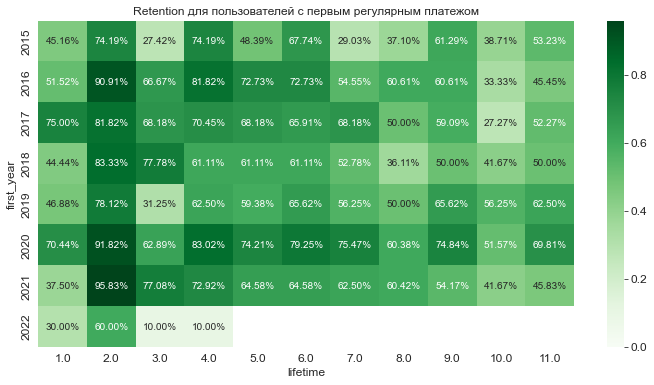

In [493]:
df_retention = df.query('is_first_rec == 1').pivot_table(
                  index='first_year',
                  columns='lifetime',
                  values='donor_id',
                  aggfunc='nunique')
df_retention
cohort_sizes = df_retention[0]

df_retention = df_retention.div(cohort_sizes, axis=0)
df_retention_first_year = df_retention.iloc[:, 1:12]

plt.figure(figsize=(12,6))
plt.title('Retention для пользователей с первым регулярным платежом')
plt.ylabel('Year')
ax = sns.heatmap(data=df_retention_first_year, annot=True, vmin=0.0, fmt='.2%', cmap='Greens')

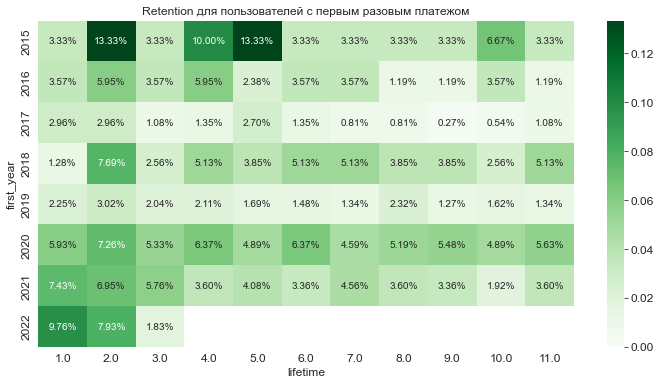

In [494]:
df_retention = df.query('is_first_rec == 0').pivot_table(
                  index='first_year',
                  columns='lifetime',
                  values='donor_id',
                  aggfunc='nunique')
df_retention
cohort_sizes = df_retention[0]

df_retention = df_retention.div(cohort_sizes, axis=0)
df_retention_first_year = df_retention.iloc[:, 1:12]

plt.figure(figsize=(12,6))
plt.title('Retention для пользователей с первым разовым платежом')
plt.ylabel('Year')
ax = sns.heatmap(data=df_retention_first_year, annot=True, vmin=0.0, fmt='.2%', cmap='Greens')

✅ **Видим очевидную разницу: пользователи, которые начали поддерживать фонд регулярными платежами, удерживаются в течение первого года значительно лучше.**

Посчитаем Retention по годам:

- для категорий с первым разовым и первым рекуррентным платежом

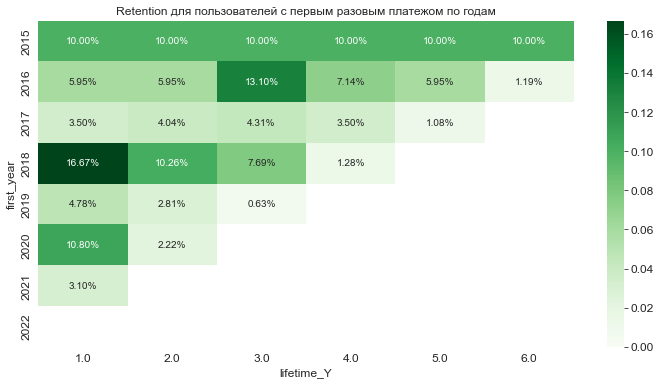

In [495]:
df['lifetime_Y'] = np.floor((df['date'] - df['first_dt'] )/np.timedelta64(1,'Y'))
df_retention = df.query('is_first_rec == 0').pivot_table(
                  index='first_year',
                  columns='lifetime_Y',
                  values='donor_id',
                  aggfunc='nunique')
df_retention
cohort_sizes = df_retention[0]

df_retention = df_retention.div(cohort_sizes, axis=0)
df_retention_first_year = df_retention.iloc[:, 1:12]

plt.figure(figsize=(12,6))
plt.title('Retention для пользователей с первым разовым платежом по годам')
plt.ylabel('Year')
ax = sns.heatmap(data=df_retention_first_year, annot=True, vmin=0.0, fmt='.2%', cmap='Greens')

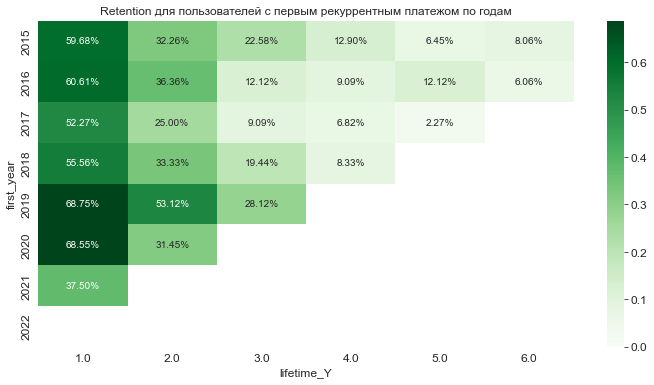

In [496]:
df_retention = df.query('is_first_rec == 1').pivot_table(
                  index='first_year',
                  columns='lifetime_Y',
                  values='donor_id',
                  aggfunc='nunique')
df_retention
cohort_sizes = df_retention[0]

df_retention = df_retention.div(cohort_sizes, axis=0)
df_retention_first_year = df_retention.iloc[:, 1:12]

plt.figure(figsize=(12,6))
plt.title('Retention для пользователей с первым рекуррентным платежом по годам')
plt.ylabel('Year')
ax = sns.heatmap(data=df_retention_first_year, annot=True, vmin=0.0, fmt='.2%', cmap='Greens')

✅ **Пользователи, которые начали поддерживать фонд регулярными платежами, удерживаются значительно лучше, особенно разница заметна в первые три года жизни когорты.**

- для категорий донорв, которые не сделали ни одного регулярного платежа или сделали хотя бы один

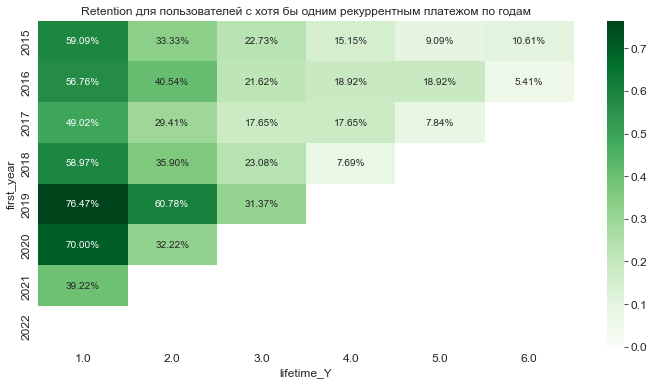

In [497]:
df_retention = df.query('donor_id in @has_rec').pivot_table(
                  index='first_year',
                  columns='lifetime_Y',
                  values='donor_id',
                  aggfunc='nunique')
df_retention
cohort_sizes = df_retention[0]

df_retention = df_retention.div(cohort_sizes, axis=0)
df_retention_first_year = df_retention.iloc[:, 1:12]

plt.figure(figsize=(12,6))
plt.title('Retention для пользователей с хотя бы одним рекуррентным платежом по годам')
plt.ylabel('Year')
ax = sns.heatmap(data=df_retention_first_year, annot=True, vmin=0.0, fmt='.2%', cmap='Greens')

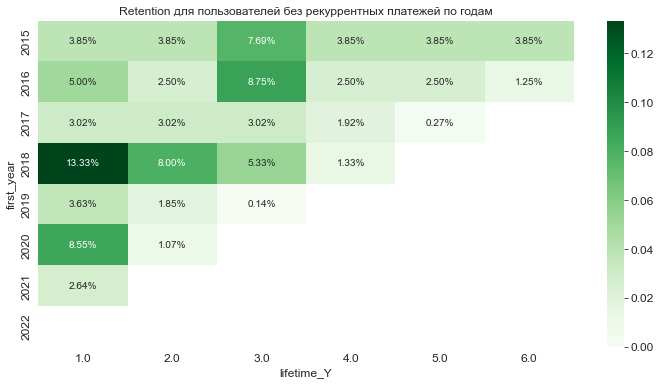

In [498]:
df_retention = df.query('donor_id not in @has_rec').pivot_table(
                  index='first_year',
                  columns='lifetime_Y',
                  values='donor_id',
                  aggfunc='nunique')
df_retention
cohort_sizes = df_retention[0]

df_retention = df_retention.div(cohort_sizes, axis=0)
df_retention_first_year = df_retention.iloc[:, 1:12]

plt.figure(figsize=(12,6))
plt.title('Retention для пользователей без рекуррентных платежей по годам')
plt.ylabel('Year')
ax = sns.heatmap(data=df_retention_first_year, annot=True, vmin=0.0, fmt='.2%', cmap='Greens')

✅ **Пользователи, которые делают регулярные платежи, удерживаются значительно лучше.**

Еще одна категория: пользователи, которые начали работу с фондом с разового платежа, но потом оформили рекуррентный. Таких пользователей немного - всего 62 человека.

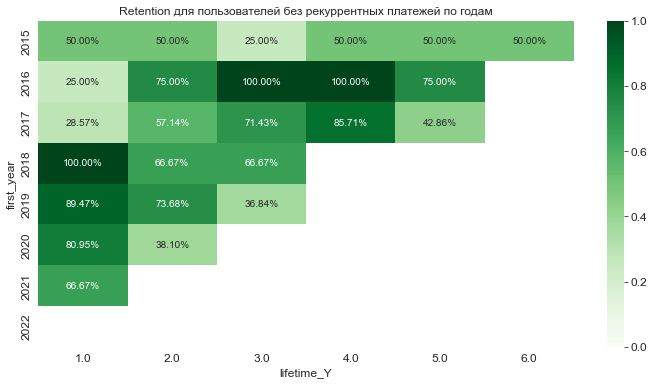

In [499]:
df_retention = df.query('is_first_rec == 0 and donor_id in @has_rec').pivot_table(
                  index='first_year',
                  columns='lifetime_Y',
                  values='donor_id',
                  aggfunc='nunique')
df_retention
cohort_sizes = df_retention[0]

df_retention = df_retention.div(cohort_sizes, axis=0)
df_retention_first_year = df_retention.iloc[:, 1:12]

plt.figure(figsize=(12,6))
plt.title('Retention для пользователей без рекуррентных платежей по годам')
plt.ylabel('Year')
ax = sns.heatmap(data=df_retention_first_year, annot=True, vmin=0.0, fmt='.2%', cmap='Greens')

✅  **Эта категория так же показывает высокие значения удержания, хотя ввиду малочисленности, к этому выводу относимся с осторожностью.**

**Однако, общая тенденция продолжает наблюдаться: пользователи, которые подписываются на регулряные платежи, значительно дольше остаются донорами.**

# Сегментация доноров

Напишем функцию, которая соберет интересующие нас метрики и выведет датафрейм:

In [547]:
def get_metrics(df, lst):
  
  mean = []
  sum = []
  count_payments = []
  count_donors = []
  payment_per_donor = []
  mean_amount = []
  lifetime = []
  index = lst
  metrics = [index, count_donors, count_payments, payment_per_donor, mean, mean_amount, sum, lifetime]
  

  for i in lst:
    q = f'donor_id in @{i}'

    count_p = round(df.query(q)['amount'].count())
    count_payments.append(count_p)

    count_d = round(df.query(q)['donor_id'].nunique())
    count_donors.append(count_d)

    ppd = round(count_p / count_d, 2)
    payment_per_donor.append(ppd)

    mean_i = round(df.query(q)['amount'].mean())
    mean.append(mean_i)

    mean_a = round(df.query(q).groupby('donor_id')['amount'].sum().mean(), 2)
    mean_amount.append(mean_a)

    sum_i = round(df.query(q)['amount'].sum())
    sum.append(sum_i)

    lt = round(df.query(q).groupby('donor_id')['lifetime'].max().mean(), 2) 
    lifetime.append(lt)

    metrics_df = pd.DataFrame(metrics).T
    metrics_df = metrics_df.set_axis(['segment', 
                                      'count_donors', 
                                      'count_payments', 
                                      'payments_per_donor', 
                                      'mean_payment',
                                      'mean_total_amount', 
                                      'sum_payments',
                                      'lifetime'], axis=1)
    metrics_df = metrics_df.set_index('segment').reset_index()

  return metrics_df
 



Получаем таблицы для сравнения метрик по сегментам.

Описание метрик:

- `count_donors`  - число доноров в сегменте
- `count_payments` - общее число пожертвований в сегменте
- `payments_per_donor` - среднее количество пожертвований на донора
- `mean_payment` - средний размер пожертвования на донора
- `mean_total_amount` - средняя сумма всех пожертвований на донора
- `sum_payments` - сумма всех пожертвований в сегменте

## По наличию регулярных платежей

Категории:
- донор сделал хоть один регулярный платеж;
- донор не сделал ни одного регулярного платежа;

In [501]:
# сделал хоть один регулярный платеж
has_rec

# не сделал ни одного регулярного платежа
has_not_rec = df.query('donor_id not in @has_rec')['donor_id'].unique()

has_rec_segment = ['has_rec', 'has_not_rec']

Сравниваем доноров, которые сделали хотя бы один рекуррентный платеж, и тех, кто делал только разовые платежи:

In [548]:
has_rec_segment_df = get_metrics(df, has_rec_segment)
has_rec_segment_df

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime
0,has_rec,486,8631,17.76,784,13926.31,6768186,19.52
1,has_not_rec,3185,5377,1.69,1497,2526.52,8046964,1.8


✅ **Пользователей, которые делали только разовые платежи, примерно в 7 раз больше, однако суммарно они принесли только на 16% больше средств. Среднее количество платежей на донора отличается более чем в 10 раз в пользу регулярных доноров. Кроме того, один регулярный донор жертвует  в 9 раз больше средств, чем донор без рекуррентных платежей. Жизненный цикл донора без рекуррентных платежей в 10 раз короче.**

## По характеру первого платежа

Категории:

- первый платеж донора был регулярным;
- первый платеж донора был разовым

In [503]:
# первый платеж донора был регулярным
first_rec = df.query('is_first_rec == 1')['donor_id'].unique()

# первый платеж донора был разовым
first_not_rec = df.query('is_first_rec == 0')['donor_id'].unique()

first_rec_segment = ['first_rec', 'first_not_rec']

In [549]:
first_rec_segment_df = get_metrics(df, first_rec_segment)
first_rec_segment_df

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime
0,first_rec,424,7353,17.34,689,11955.74,5069233,17.83
1,first_not_rec,3247,6655,2.05,1464,3001.51,9745917,2.36


✅ **Пользователей, начавших с рекуррентного платежа, в 7.5 раз меньше. Однако среднее число пожертвований на пользователя в этой категории выше в 8 раз. Также, один донор из этой категории приносит в 6.5 раз больше, чем донор, начавший с разового платежа. Жизненный цикл донора, начавшего с регулярного платежа, в 8 раз длиннее.**

## По полу

In [505]:
male_donors = df.query('gender == "male"')

In [550]:
male_donors = df.query('gender == "male"')['donor_id'].unique()
female_donors = df.query('gender == "female"')['donor_id'].unique()
NA = df[df['gender'].isna() == True]['donor_id'].unique()
gender_segment = ['male_donors', 'female_donors', 'NA']

gender_segment_df = get_metrics(df, gender_segment)
gender_segment_df

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime
0,male_donors,551,2784,5.05,1861,9403.24,5181186,5.78
1,female_donors,1868,9654,5.17,907,4689.05,8759140,6.09
2,NA,1252,1570,1.25,557,698.74,874824,0.53


✅ **Доноров-женщин в 3.5 раза больше, чем доноров-мужчин. Средний платеж, который делает мужчина, почти в два раза больше среднего платежа женщин; средняя сумма пожертвований мужчин в 1.76 раз выше.** 

**Необходимо отметить, что 1246 жертвователей не указали свой пол, поэтому к этим выводам следует относиться с определенной осторожностью. Но исследование показывает, что пожертвования от доноров, не указавших свой пол, это, как правило разовые пожертвования небольшого размера.**

## По направлению пожертвования

Соберем списки пользователей, которые жертвуют на наиболее часто встречающиеся программы.

In [507]:
# «на обучение» 
edu_donors = df.loc[df['purpose'].str.contains("обучение") == True]['donor_id'].unique()

# «на проживание 
loc_donors = df.loc[df['purpose'].str.contains("проживание") == True]['donor_id'].unique()

# «на тьютора 
tut_donors = df.loc[df['purpose'].str.contains("тьютор") == True]['donor_id'].unique()

# «sms bdd» 
sms_donors = df.loc[df['purpose'].str.contains("sms") == True]['donor_id'].unique()

# «добровольное пожертвование» 
nds_donors = df.loc[df['purpose'].str.contains("ндс не облагается") == True]['donor_id'].unique()

purpose_segment = ['edu_donors', 'loc_donors', 'tut_donors', 'sms_donors', 'nds_donors']

In [551]:
purpose_segment_df = get_metrics(df, purpose_segment)
purpose_segment_df

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime
0,edu_donors,471,2675,5.68,1473,8364.22,3939547,9.26
1,loc_donors,78,797,10.22,1461,14926.9,1164298,14.13
2,tut_donors,44,493,11.2,1098,12300.89,541239,14.27
3,sms_donors,174,761,4.37,836,3654.44,635873,5.69
4,nds_donors,245,504,2.06,509,1046.56,256407,1.36


In [509]:
has_rec_donors = []
first_not_rec_donors = []
for _ in purpose_segment:
  m = df.query(f'donor_id in @{_} and donor_id in @has_rec')['donor_id'].nunique()
  n = df.query(f'donor_id in @{_} and donor_id in @has_rec and donor_id not in @first_rec')['donor_id'].nunique()
  has_rec_donors.append(m)
  first_not_rec_donors.append(n)

purpose_segment_df['has_rec_donors'] = has_rec_donors
purpose_segment_df['has_rec_donors_ratio'] = purpose_segment_df['has_rec_donors'] / purpose_segment_df['count_donors'] * 100
purpose_segment_df['has_rec_donors_ratio'] = (purpose_segment_df['has_rec_donors_ratio']).astype(float).round(2)

purpose_segment_df['first_not_rec_donors'] = first_not_rec_donors
purpose_segment_df['first_not_rec_donors_ratio'] = purpose_segment_df['first_not_rec_donors'] / purpose_segment_df['count_donors'] * 100
purpose_segment_df['first_not_rec_donors_ratio'] = (purpose_segment_df['first_not_rec_donors_ratio']).astype(float).round(2)

purpose_segment_df

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime,has_rec_donors,has_rec_donors_ratio,first_not_rec_donors,first_not_rec_donors_ratio
0,edu_donors,471,2675,5.68,1473,8364.22,3939547,9.26,55,11.68,25,5.31
1,loc_donors,78,797,10.22,1461,14926.9,1164298,14.13,14,17.95,8,10.26
2,tut_donors,44,493,11.2,1098,12300.89,541239,14.27,10,22.73,2,4.55
3,sms_donors,174,761,4.37,836,3654.44,635873,5.69,14,8.05,9,5.17
4,nds_donors,245,504,2.06,509,1046.56,256407,1.36,0,0.00,0,0.00


✅ **Видим, что меньше всего доноров жертвуют «на тьютора», при этом, в этой группе наибольшее количество пользователей сделали хотя бы один рекуррентый платеж. Также, среднее количество жертвователей на пользователя в этой категории выше, чем в остальных. Вероятно, нерегулярные пользователи не очень понимают ценность данной программы, и стоит объяснять им это. А есть, напротив, доноры, которые охотно жертвуют на эту программу.**

**«На обучение» жертвуют чаще всего, впрочем, таких программ значительно больше остальных. Среднее количество платежей на пользователя и средняя сумма пожертвования ниже, чем в категориях на проживание и на тьютора.**

**Доноры, которые жертвуют на тьюторов и на проживание имеют наибольший средний лайфтайм - это жертвователи, которые долго с фондом. Следом идут жертвователи на образование. Те, кто переводят деньги через SMS имеют наименьший средний размер пожертвования.**

**В категорию «добровольное пожертвование, ндс не облагается» попадают, видимо, пользователи, не указавшие цель пожертвования и переводящие деньги через какое-то банковское приложение, которое таким образов маркирует переводы. Эти пользователи имеют наименьший лайфтайм и средний размер пожертвования.**

# Метрики для обучения модели (?)

**В целом не вижу большого смысла именно в обучении модели на имеющихся данных. Предлагаю сегментировать пользователей и дать рекомендации по работе с сегментами и в целом по стратегии взаимодействия с донорами**

<AxesSubplot:>

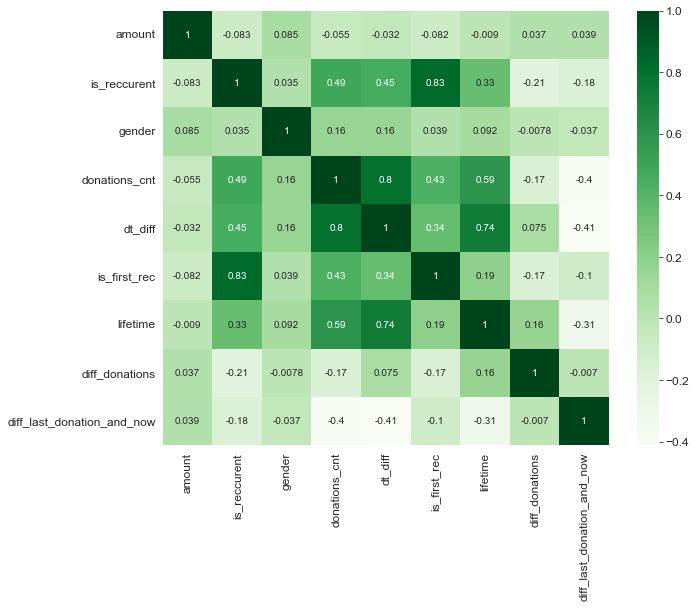

In [510]:
metrics = df[[
              'amount', 
              'is_reccurent', 
              'gender', 
              'donations_cnt',
              'dt_diff', 
              'is_first_rec', 
              'lifetime', 
              'diff_donations', 
              'diff_last_donation_and_now'
              ]]
metrics['gender'] = [1 if _ == "male" else 0 for _ in metrics['gender']]
sns.heatmap(metrics.corr(), annot=True, cmap='Greens')

In [511]:
### КОММЕНТАРИЙ РЕВЬЮЕРА
## а вот тут сразу нет, у нас одна строчка должна быть один пользователь
## сложность состоит в том, чтобы подобрать показатели для профиля
## ты нашёл крутой показатель - был ли 1ый платёж реккурентным
## можно смотреть доли реккурентных платежей, доли по категориям
## размеры платежей в первый месяц/квартал лайфтайма и т.п.

In [512]:
metrics.shape

(14008, 9)

Удаляем столбцы с сильной корреляцией:

In [578]:
df_f = df.duplicated('donor_id')
df_metrics = df[df_f == False]
df_metrics.shape[0]

3671

In [579]:
metrics = df[[
              'amount', 
              'gender', 
              'donations_cnt',
              'is_first_rec', 
              'lifetime', 
              'diff_donations', 
              'diff_last_donation_and_now'
              ]]

In [591]:
metrics['gender'] = [1 if _ == "male" else 0 for _ in metrics['gender']]

In [592]:
### КОММЕНТ РЕВЬЮЕРА
## логичнее было бы сделать 1 — мужчина, -1 — женщина, а неопределённые 0

In [593]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [594]:
scaler = StandardScaler()

In [595]:
metrics= metrics.dropna(how='any')

In [596]:
X = metrics
X_sc = scaler.fit_transform(X)
# linked = linkage(X_sc, method = 'ward') 

# plt.figure(figsize=(15, 10))  
# dendrogram(linked, orientation='top')
# plt.title('Иерархическая кластеризация')
# plt.show() 

In [603]:
metrics['churn'] = [1 if _ > 12 else 0 for _ in metrics['diff_last_donation_and_now']]

In [604]:
km = KMeans(n_clusters=3, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [605]:
# сохраняем метки кластера в поле нашего датасета
metrics['cluster'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
mean_by_cluster = metrics.groupby('cluster').mean()
mean_by_cluster

,amount,gender,donations_cnt,is_first_rec,lifetime,diff_donations,diff_last_donation_and_now,churn
cluster,,,,,,,,
0,678.587421,0.0,34.295388,0.850734,19.693920,1.055556,2.644654,0.031656
1,1481.469626,0.0,14.554815,0.003333,10.462593,2.745926,12.629630,0.392222
2,805.568887,0.0,21.972794,0.998256,10.493198,1.104639,36.525288,0.862923


## Исследование доноров, сделавших более одного пожертвования

In [535]:
one_timers = df[df['donations_cnt'] == 1]

In [542]:
df_many = df.drop(one_timers.index).copy()
df_many.shape[0]

11376

In [546]:
df_many['amount'].describe()

count     11376.000000
mean        957.326334
std        3731.542935
min           0.160000
25%         200.000000
50%         500.000000
75%        1000.000000
max      250000.000000
Name: amount, dtype: float64

In [552]:
get_metrics(df_many, has_rec_segment)

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime
0,has_rec,467,8612,18.44,781,14398.16,6723940,20.32
1,has_not_rec,572,2764,4.83,1507,7284.27,4166604,10.04


In [553]:
get_metrics(df_many, purpose_segment)

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime
0,edu_donors,251,2455,9.78,1464,14318.29,3593892,17.38
1,loc_donors,55,774,14.07,1471,20707.05,1138888,20.04
2,tut_donors,34,483,14.21,1058,15033.5,511139,18.47
3,sms_donors,61,648,10.62,938,9965.84,607916,16.23
4,nds_donors,62,321,5.18,585,3030.55,187894,5.39


In [558]:
get_metrics(df_many, gender_segment)

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime
0,male_donors,211,2444,11.58,1519,17592.01,3711913,15.1
1,female_donors,724,8510,11.75,807,9479.83,6863396,15.73
2,NA,104,422,4.06,747,3031.11,315235,6.34


In [559]:
get_metrics(df_many, first_rec_segment)

,segment,count_donors,count_payments,payments_per_donor,mean_payment,mean_total_amount,sum_payments,lifetime
0,first_rec,405,7334,18.11,685,12407.38,5024987,18.66
1,first_not_rec,634,4042,6.38,1451,9251.67,5865557,12.1
